In [1]:
#importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv(r"C:\Users\viswa\Downloads\archive\train-data.csv")

In [4]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
data.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
data.shape

(6019, 14)

In [8]:
data= data.drop('Unnamed: 0', axis=1)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [9]:
#Checking for null values 

In [10]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
#removing null values except 'New_Price' as it has a significant number of null values

In [12]:
data= data[data['Mileage'].notna()]
#Removing Mileage from the data
data.shape

(6017, 13)

In [13]:
for feature in ['Engine','Power','Seats']:
    data= data[data[feature].notna()]

In [14]:
data.shape
#These are the remaining rows in the dataset

(5975, 13)

In [15]:
data = data.reset_index(drop=True)

In [16]:
# FEATURE ENGINEERING

In [17]:
#Making 'Engine' feature more readable and understandable by the machine

In [18]:
data['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
5970    1248 CC
5971    1120 CC
5972    2498 CC
5973     998 CC
5974     936 CC
Name: Engine, Length: 5975, dtype: object

In [19]:
int(data['Engine'][0].split(' ')[0])

998

In [20]:
data['Engine_CC']=data['Engine'].apply(lambda x: int(x.split(' ')[0]))
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Engine_CC
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,998
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,1582
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,1199
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,1248
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,1968


In [21]:
# Dealing with the 'Power' feature

In [22]:
data['Power_bhp']=data['Power'].apply(lambda x: float(x.split(' ')[0]))

In [23]:
# Similarly changine 'Mileage' feature from object to float

In [24]:
data['Mileage_kmpl']=data['Mileage'].apply(lambda x: float(x.split(' ')[0]))

In [25]:
# Manually encoding 'Owner_Type' feature

In [26]:
data['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [27]:
dict_owner_type={'First':1,'Second':2,'Third':3,'Fourth & Above':4}

In [28]:
data['Owner_Type']=data['Owner_Type'].map(dict_owner_type)

In [29]:
preprocess_data=data.drop(['Mileage','Engine','Power'],axis=1)

In [30]:
preprocess_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Engine_CC,Power_bhp,Mileage_kmpl
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,5.0,NaN,1.75,998,58.16,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,5.0,NaN,12.50,1582,126.20,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,5.0,8.61 Lakh,4.50,1199,88.70,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,7.0,NaN,6.00,1248,88.76,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,NaN,17.74,1968,140.80,15.20


In [97]:
# Data visualisation

<AxesSubplot:xlabel='Mileage_kmpl', ylabel='Count'>

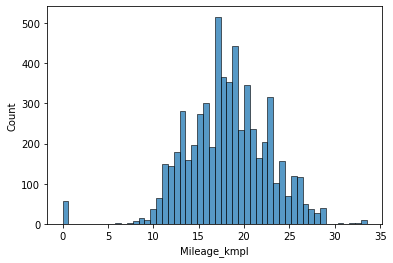

In [100]:
sns.histplot(data = preprocess_data , x = 'Mileage_kmpl')

<AxesSubplot:xlabel='Power_bhp', ylabel='Count'>

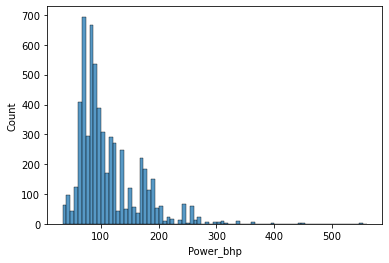

In [101]:
sns.histplot(data = preprocess_data , x = 'Power_bhp')

In [ ]:
sns.histplot(data = preprocess_data , x = '')

<AxesSubplot:>

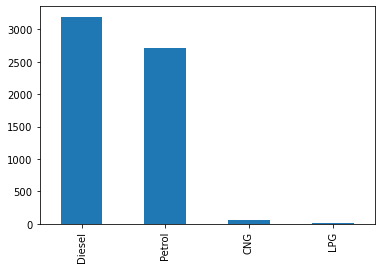

In [105]:
preprocess_data['Fuel_Type'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Owner_Type'>

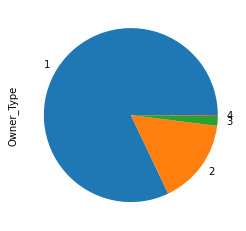

In [108]:
preprocess_data['Owner_Type'].value_counts().plot(kind='pie')

In [31]:
# one hot encoding of "Transmission" and " Fuel_Type" feature

In [32]:
preprocess_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [33]:
preprocess_data['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [34]:
Transmission=pd.get_dummies(preprocess_data.Transmission)
Transmission

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
5970,0,1
5971,0,1
5972,0,1
5973,0,1


In [35]:
Fuel_Type=pd.get_dummies(preprocess_data.Fuel_Type)
Fuel_Type

,CNG,Diesel,LPG,Petrol
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
5970,0,1,0,0
5971,0,1,0,0
5972,0,1,0,0
5973,0,0,0,1


In [36]:
preprocess_data['Location'].value_counts()

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

In [37]:
Location=pd.get_dummies(preprocess_data.Location)
Location

,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5970,0,0,0,0,1,0,0,0,0,0,0
5971,0,0,0,0,0,0,1,0,0,0,0
5972,0,0,0,0,0,0,1,0,0,0,0
5973,0,0,0,0,0,0,0,0,1,0,0


In [38]:
# Concatenating all the encoded features 

In [39]:
cat_var= [col for col in preprocess_data.columns if preprocess_data[col].dtypes=='object']
cat_var

['Name', 'Location', 'Fuel_Type', 'Transmission', 'New_Price']

In [40]:
num_var=[col for col in preprocess_data.columns if preprocess_data[col].dtypes!='object']
num_var

['Year',
 'Kilometers_Driven',
 'Owner_Type',
 'Seats',
 'Price',
 'Engine_CC',
 'Power_bhp',
 'Mileage_kmpl']

In [41]:
num_dataframe=preprocess_data[['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price', 'Engine_CC','Power_bhp','Mileage_kmpl']]
num_dataframe

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Engine_CC,Power_bhp,Mileage_kmpl
0,2010,72000,1,5.0,1.75,998,58.16,26.60
1,2015,41000,1,5.0,12.50,1582,126.20,19.67
2,2011,46000,1,5.0,4.50,1199,88.70,18.20
3,2012,87000,1,7.0,6.00,1248,88.76,20.77
4,2013,40670,2,5.0,17.74,1968,140.80,15.20
...,...,...,...,...,...,...,...,...
5970,2014,27365,1,5.0,4.75,1248,74.00,28.40
5971,2015,100000,1,5.0,4.00,1120,71.00,24.40
5972,2012,55000,2,8.0,2.90,2498,112.00,14.00
5973,2013,46000,1,5.0,2.65,998,67.10,18.90


In [42]:
preprocess_data.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Engine_CC,Power_bhp,Mileage_kmpl
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,5.0,NaN,1.75,998,58.16,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,5.0,NaN,12.50,1582,126.20,19.67


In [43]:
preprocess_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type             int64
Seats                float64
New_Price             object
Price                float64
Engine_CC              int64
Power_bhp            float64
Mileage_kmpl         float64
dtype: object

In [44]:
encoded_data=pd.concat([Location,Fuel_Type,Transmission], axis='columns')

In [45]:
final_num_data= pd.concat([num_dataframe,encoded_data],axis=1)
final_num_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Engine_CC,Power_bhp,Mileage_kmpl,Ahmedabad,Bangalore,...,Kochi,Kolkata,Mumbai,Pune,CNG,Diesel,LPG,Petrol,Automatic,Manual
0,2010,72000,1,5.0,1.75,998,58.16,26.60,0,0,...,0,0,1,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,1582,126.20,19.67,0,0,...,0,0,0,1,0,1,0,0,0,1
2,2011,46000,1,5.0,4.50,1199,88.70,18.20,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2012,87000,1,7.0,6.00,1248,88.76,20.77,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2013,40670,2,5.0,17.74,1968,140.80,15.20,0,0,...,0,0,0,0,0,1,0,0,1,0


In [46]:
# Add the categorical data to the numerical data

In [47]:
cat_var

['Name', 'Location', 'Fuel_Type', 'Transmission', 'New_Price']

In [48]:
# 'Location', 'Fuel_Type', 'Transmission' features are encoded already 
# so we have to deal with name and new_price

In [49]:
remaining_cat_variables= preprocess_data[['Name','New_Price']]
remaining_cat_variables.head(2)

,Name,New_Price
0,Maruti Wagon R LXI CNG,NaN
1,Hyundai Creta 1.6 CRDi SX Option,NaN


In [50]:
remaining_cat_variables['Brands']=remaining_cat_variables['Name'].apply(lambda x: x.split(' ')[0])
remaining_cat_variables

C:\Users\viswa\AppData\Local\Temp/ipykernel_16524/2632905873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_cat_variables['Brands']=remaining_cat_variables['Name'].apply(lambda x: x.split(' ')[0])


,Name,New_Price,Brands
0,Maruti Wagon R LXI CNG,NaN,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,NaN,Hyundai
2,Honda Jazz V,8.61 Lakh,Honda
3,Maruti Ertiga VDI,NaN,Maruti
4,Audi A4 New 2.0 TDI Multitronic,NaN,Audi
...,...,...,...
5970,Maruti Swift VDI,7.88 Lakh,Maruti
5971,Hyundai Xcent 1.1 CRDi S,NaN,Hyundai
5972,Mahindra Xylo D4 BSIV,NaN,Mahindra
5973,Maruti Wagon R VXI,NaN,Maruti


In [51]:
remaining_cat_variables= remaining_cat_variables.drop('New_Price', axis =1)
remaining_cat_variables

,Name,Brands
0,Maruti Wagon R LXI CNG,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai
2,Honda Jazz V,Honda
3,Maruti Ertiga VDI,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Audi
...,...,...
5970,Maruti Swift VDI,Maruti
5971,Hyundai Xcent 1.1 CRDi S,Hyundai
5972,Mahindra Xylo D4 BSIV,Mahindra
5973,Maruti Wagon R VXI,Maruti


In [52]:
#  chopping the name of the cars to better use data

In [53]:
remaining_cat_variables['Car_Name']= remaining_cat_variables['Name'].apply(lambda x: ' '.join(x.split()[:2]))
remaining_cat_variables

,Name,Brands,Car_Name
0,Maruti Wagon R LXI CNG,Maruti,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Hyundai Creta
2,Honda Jazz V,Honda,Honda Jazz
3,Maruti Ertiga VDI,Maruti,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Audi,Audi A4
...,...,...,...
5970,Maruti Swift VDI,Maruti,Maruti Swift
5971,Hyundai Xcent 1.1 CRDi S,Hyundai,Hyundai Xcent
5972,Mahindra Xylo D4 BSIV,Mahindra,Mahindra Xylo
5973,Maruti Wagon R VXI,Maruti,Maruti Wagon


In [54]:
remaining_cat_variables=remaining_cat_variables.drop('Name', axis=1)

In [55]:
# Categorical transformation
!pip install --upgrade category_encoders
import category_encoders as ce

In [56]:
Nominal_data = ['Car_Name','Brands']
binaryencoder = ce.BinaryEncoder(cols=Nominal_data)
remaining_cat_variables = binaryencoder.fit_transform(remaining_cat_variables)

In [58]:
remaining_cat_variables.head()

,Brands_0,Brands_1,Brands_2,Brands_3,Brands_4,Car_Name_0,Car_Name_1,Car_Name_2,Car_Name_3,Car_Name_4,Car_Name_5,Car_Name_6,Car_Name_7
0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,1,0,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,1


In [63]:
# Concatenate both numerical and categorical data
final_data=pd.concat([final_num_data, remaining_cat_variables], axis='columns')
final_data.head(2)

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Engine_CC,Power_bhp,Mileage_kmpl,Ahmedabad,Bangalore,...,Brands_3,Brands_4,Car_Name_0,Car_Name_1,Car_Name_2,Car_Name_3,Car_Name_4,Car_Name_5,Car_Name_6,Car_Name_7
0,2010,72000,1,5.0,1.75,998,58.16,26.60,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2015,41000,1,5.0,12.50,1582,126.20,19.67,0,0,...,1,0,0,0,0,0,0,0,1,0


In [64]:
# Build a model

In [68]:
from sklearn.model_selection import train_test_split
X=final_data.drop('Price',axis=1)
X

,Year,Kilometers_Driven,Owner_Type,Seats,Engine_CC,Power_bhp,Mileage_kmpl,Ahmedabad,Bangalore,Chennai,...,Brands_3,Brands_4,Car_Name_0,Car_Name_1,Car_Name_2,Car_Name_3,Car_Name_4,Car_Name_5,Car_Name_6,Car_Name_7
0,2010,72000,1,5.0,998,58.16,26.60,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2015,41000,1,5.0,1582,126.20,19.67,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2011,46000,1,5.0,1199,88.70,18.20,0,0,1,...,1,1,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,1248,88.76,20.77,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,2013,40670,2,5.0,1968,140.80,15.20,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,2014,27365,1,5.0,1248,74.00,28.40,0,0,0,...,0,1,0,0,0,0,1,1,0,1
5971,2015,100000,1,5.0,1120,71.00,24.40,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5972,2012,55000,2,8.0,2498,112.00,14.00,0,0,0,...,1,0,1,0,0,0,1,0,0,0
5973,2013,46000,1,5.0,998,67.10,18.90,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [69]:
y=final_data['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
5970     4.75
5971     4.00
5972     2.90
5973     2.65
5974     2.50
Name: Price, Length: 5975, dtype: float64

In [70]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=1)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [76]:
Linear_reg=LinearRegression()

In [77]:
Linear_reg.fit(X_train,y_train)

LinearRegression()

In [79]:
X_val=Linear_reg.predict(X_test)

In [82]:
mae=mean_absolute_error(X_val, y_test)
mae

3.3512708039413766

In [84]:
print('Accuracy of Model:',Linear_reg.score(X_train,y_train))

Accuracy of Model: 0.7059279328052628


In [85]:
print('Accuracy of Model:',Linear_reg.score(X_test,y_test))

Accuracy of Model: 0.7710834292542647


In [86]:
# Let us try Random Forest

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
DecisionTree_model= DecisionTreeRegressor(random_state=1).fit(X_train,y_train)

In [91]:
X_val=DecisionTree_model.predict(X_test)

In [92]:
mae=mean_absolute_error(X_val, y_test)
mae

1.9648058902275771

In [95]:
print('Accuracy of Model for training data:',DecisionTree_model.score(X_train,y_train))

Accuracy of Model for training data: 0.9999979843140917


In [96]:
print('Accuracy of Model for testing data:',DecisionTree_model.score(X_test,y_test))

Accuracy of Model for testing data: 0.8272254897332917
